In [1]:
# !kaggle competitions download -c santander-customer-transaction-prediction

In [2]:
# from zipfile import ZipFile

In [3]:
# with ZipFile('santander-customer-transaction-prediction.zip', 'r') as zipObj:
#     zipObj.extractall()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
sns.set_theme()

In [3]:
train_df = pd.read_csv('C:/Users\Mahadev\Desktop/vaishaliDS\santanderData/train.csv')
train_df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [5]:
train_df.drop(columns=['ID_code'], inplace=True, axis=1)

# EDA

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, target to var_199
dtypes: float64(200), int64(1)
memory usage: 306.7 MB


In [7]:
train_df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
train_df.corr()['target'].sort_values(ascending=False)

target     1.000000
var_6      0.066731
var_110    0.064275
var_53     0.063399
var_26     0.062422
             ...   
var_76    -0.061917
var_146   -0.063644
var_12    -0.069489
var_139   -0.074080
var_81    -0.080917
Name: target, Length: 201, dtype: float64

In [9]:
train_df.isna().sum().sum()

0

<AxesSubplot:>

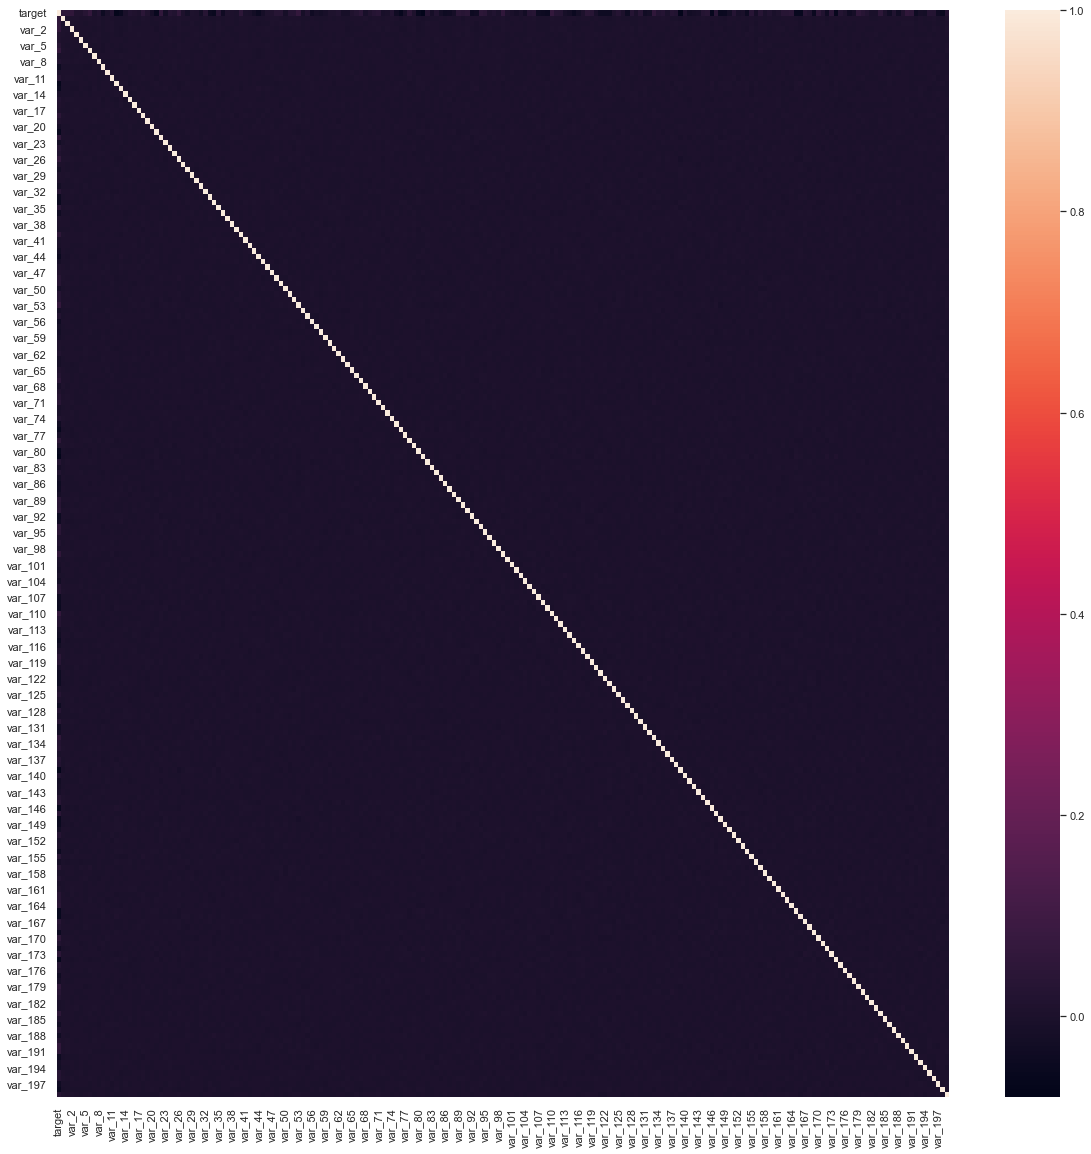

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr())

Text(0.5, 1.0, 'Number of target values')

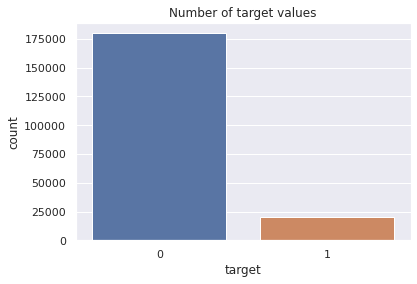

In [13]:
sns.countplot(data=train_df, x='target')
plt.title('Number of target values')

In [14]:
def plot_feature_distribution(df):
    plt.title("Distribution of all features")
    fig, axes = plt.subplots(20, 10, figsize=(20, 50))
    fig.subplots_adjust(hspace=1.01, wspace=0.1)

    for i, col in enumerate(df.columns[1:]):
        plt.subplot(20,10,i+1)
        sns.histplot(data=df, x=col, kde=True, hue='target')
        plt.tick_params(axis='both', left=False, bottom=False, labelleft=False)
        plt.ylabel('')

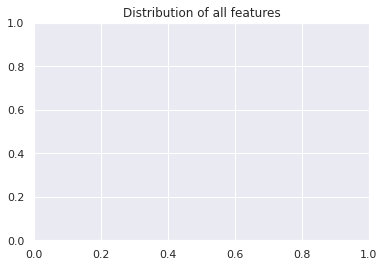

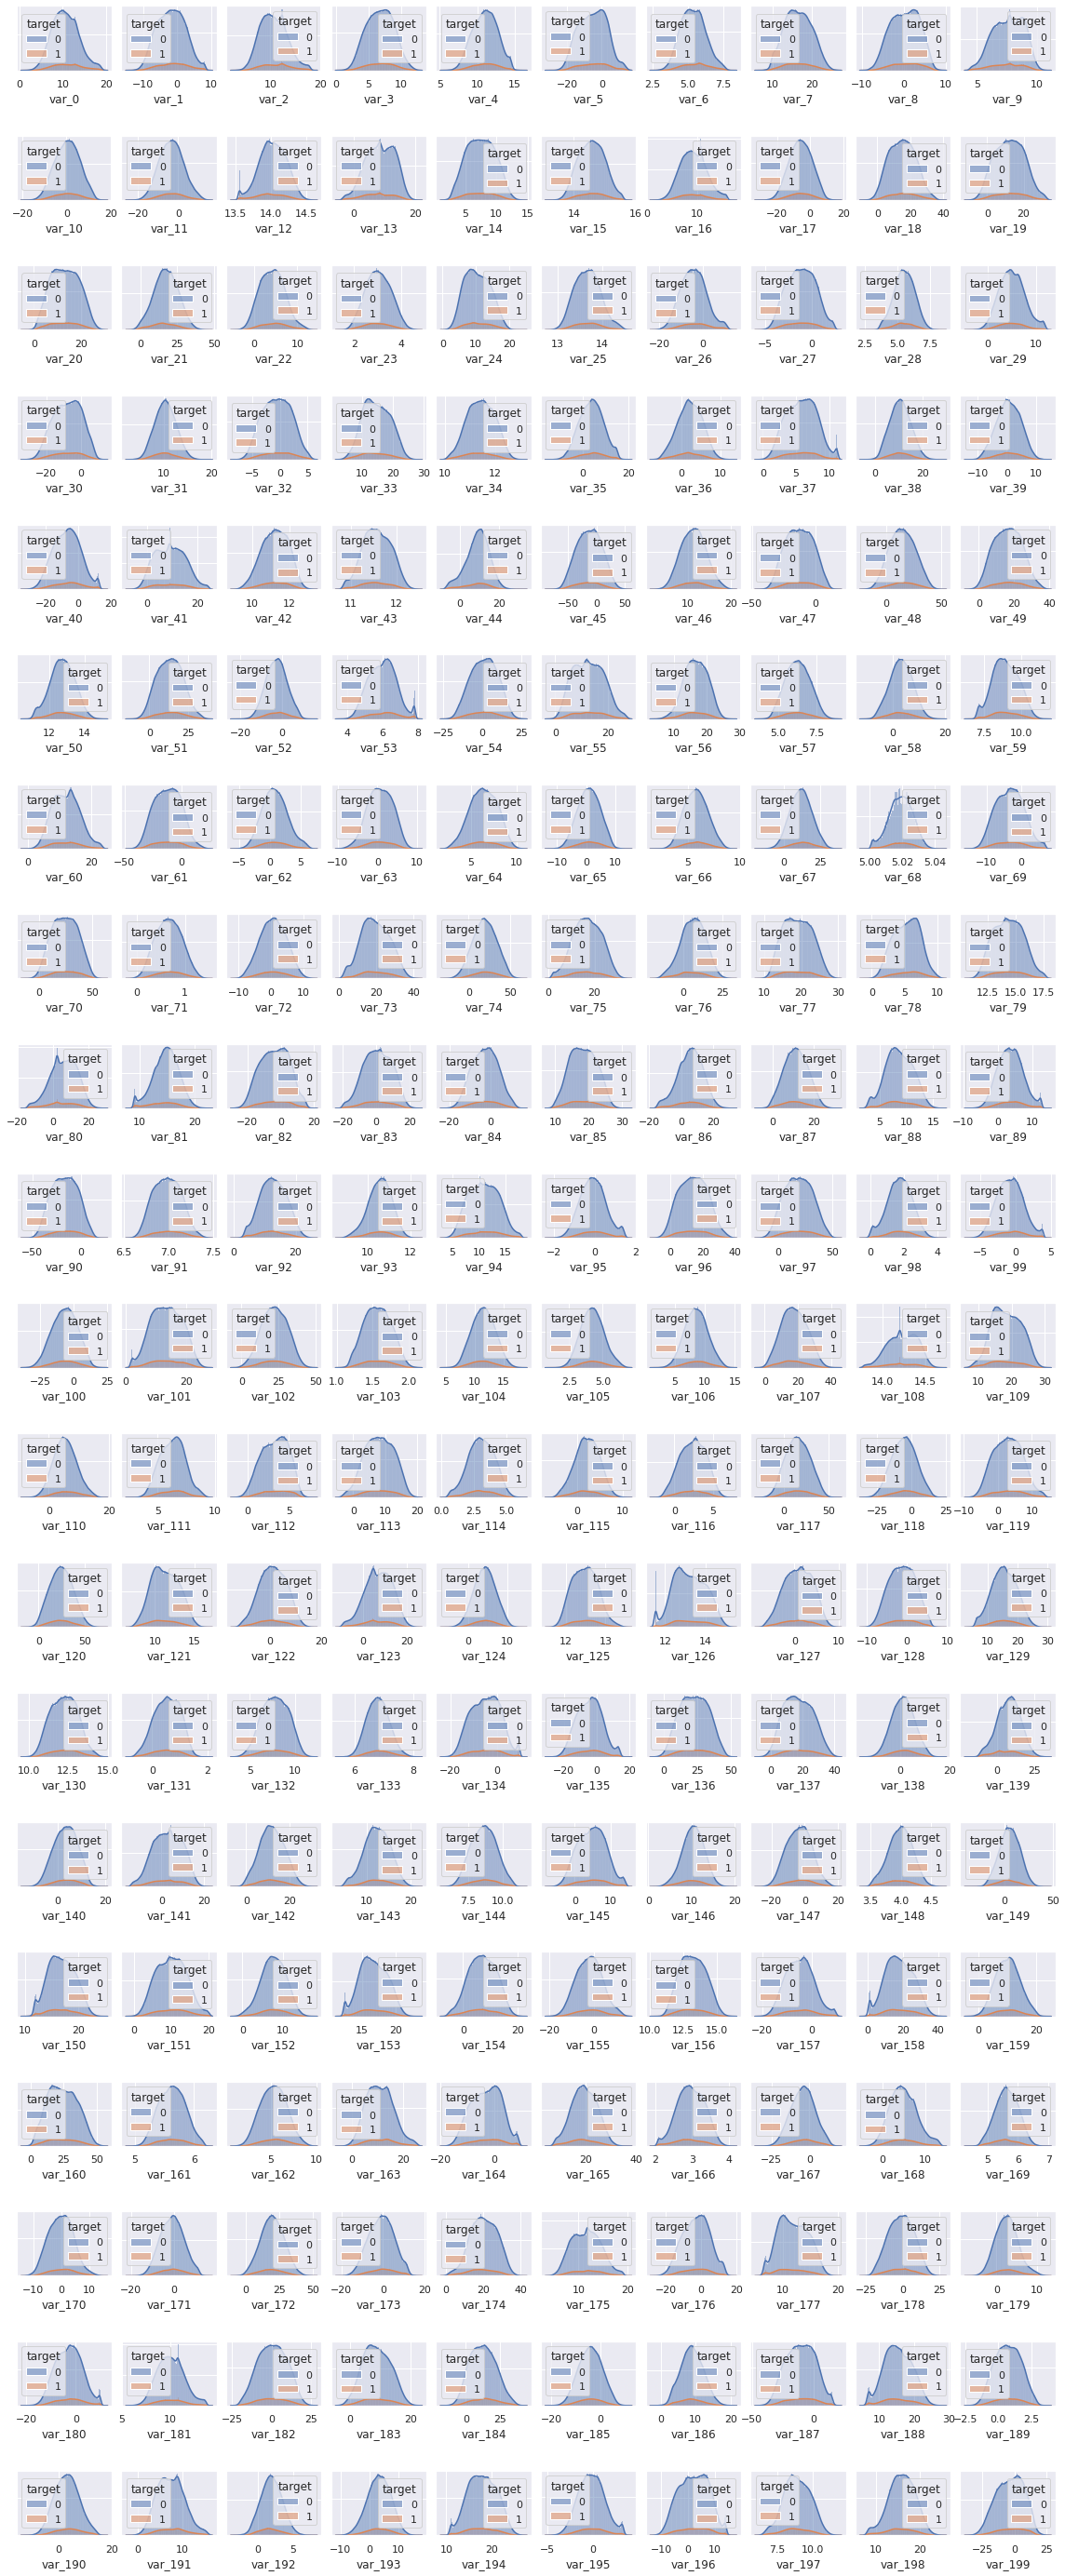

In [15]:
plot_feature_distribution(train_df)

# EDA results
- There are not correlated features
- All feature distributions are very similar to the normal distribution
- Number of 0 is much greater than 1

# Feature engineering and data preprocessing

In [16]:
pip install feature_engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [17]:
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures, DropCorrelatedFeatures

In [18]:
cols_dupl = DropDuplicateFeatures(variables=None)
cols_const = DropConstantFeatures(tol=0.99, variables=None)
cols_corr = DropCorrelatedFeatures(threshold=0.85, method='pearson')
cols_to_del = set()
unique_map = {}

In [19]:
for col in tqdm(train_df.columns[1:]):
    unique_map[col] = (train_df[col].value_counts() == 1).to_dict()

100%|██████████| 200/200 [00:22<00:00,  9.04it/s]


In [20]:
def preprocess_data(df, test=False):
    global cols_dupl, cols_const, cols_corr, cols_to_del
    if not test:
        cols_const.fit(df)
        cols_to_del = cols_to_del.union(cols_const.features_to_drop_)
        cols_dupl.fit(df)
        cols_to_del = cols_to_del.union(cols_dupl.features_to_drop_)
        cols_corr.fit(df)
        cols_to_del = cols_to_del.union(cols_corr.features_to_drop_)
    
    if not test:
        for col in tqdm(df.columns[1:]):
            unique_col = df[col].rename(f"{col}_unique").copy()
            unique_col = unique_col.map(unique_map[col]).astype(bool)
            df = pd.concat([df, pd.DataFrame(unique_col)], axis=1)
    else:
        for col in tqdm(df.columns):
            unique_col = df[col].rename(f"{col}_unique").copy()
            unique_col = unique_col.map(unique_map[col]).astype(bool)
            df = pd.concat([df, pd.DataFrame(unique_col)], axis=1)
    df.drop(columns=cols_to_del, inplace=True, axis=1)
    return df

In [21]:
train_df = preprocess_data(train_df)
train_df.head()

100%|██████████| 200/200 [00:17<00:00, 11.20it/s]


,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190_unique,var_191_unique,var_192_unique,var_193_unique,var_194_unique,var_195_unique,var_196_unique,var_197_unique,var_198_unique,var_199_unique
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,False,False,False,False,False,False,False,False,False,False
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,False,False,False,True,True,False,False,False,False,True
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,False,False,False,True,False,False,False,False,False,False
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,True,False,False,False,False,False,False,False,False,False
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,False,False,True,True,True,False,False,False,False,False


In [22]:
cols_to_del

set()

In [23]:
test_df = pd.read_csv('C:/Users\Mahadev\Desktop/vaishaliDS\santanderData/test.csv')
test_df.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [24]:
test_df.isna().sum().sum()

0

In [25]:
id_code = test_df['ID_code']
test_df.drop(columns=['ID_code'], axis=1, inplace=True)

In [26]:
test_df = preprocess_data(test_df, test=True)
test_df.head()

100%|██████████| 200/200 [00:17<00:00, 11.43it/s]


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190_unique,var_191_unique,var_192_unique,var_193_unique,var_194_unique,var_195_unique,var_196_unique,var_197_unique,var_198_unique,var_199_unique
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,True,True,True,False,True,True,False,False,False,True
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,True,False,True,True,False,False,True,False,False,True
2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,True,False,False,True,False,True,True,False,True,True
3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,True,True,False,True,False,False,True,False,False,True
4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,True,True,False,False,False,False,True,False,True,True


# Model defining

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
from typing import Union

In [28]:
X = train_df.drop(columns=['target']).astype(float)
Y = train_df['target']
X.shape, Y.shape

((200000, 400), (200000,))

In [29]:
X_test = test_df.astype(float)
X_test.shape

(200000, 400)

In [30]:
# algorithms = {
#     'LogisticRegression': LogisticRegression(),
#     'SVC': SVC(),
#     'AdaBoostClassifier': AdaBoostClassifier(),
#     'GradientBoostingClassifier': GradientBoostingClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(),
#     'XGBClassifier': XGBClassifier(),
#     'XGBRFClassifier': XGBRFClassifier()
# }

# models = {}

# param_grid = {
#     'LogisticRegression': {
#         'C': [1.0, 5.0]
#     },
#     'SVC': {
#         'C': [1.0, 5.0],
#         'kernel': ['rbf', 'sigmoid']
#     },
#     'AdaBoostClassifier': {
#         'n_estimators': [100, 300],
#     },
#     'GradientBoostingClassifier': {
#         'n_estimators': [100, 300],
#         'max_depth': [5, 7]
#     },
#     'RandomForestClassifier': {
#         'n_estimators': [100, 300],
#         'max_depth': [5, 7]
#     },
#     'XGBClassifier': {
#         'n_estimators': [100, 300],
#         'max_depth': [5, 7]
#     },
#     'XGBRFClassifier': {
#         'n_estimators': [100, 300],
#         'max_depth': [5, 7]
#     }
# }

# scores = pd.DataFrame(data={'AUC': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []})

In [31]:
# def add_score(model, index, y_pred):
#     global scores
#     scores.loc[index, "AUC"] = roc_auc_score(Y, y_pred)
#     scores.loc[index, "Accuracy"] = accuracy_score(Y, y_pred)
#     scores.loc[index, "Precision"] = precision_score(Y, y_pred)
#     scores.loc[index, "Recall"] = recall_score(Y, y_pred)
#     scores.loc[index, "F1"] = f1_score(Y, y_pred)

In [32]:
# def train(scaler: Union['none', 'Standard', 'MinMax']='none'):
#     global models
#     if scaler == 'none':
#         for index, model in algorithms.items():
#             models[index] = GridSearchCV(estimator=model, param_grid=param_grid[index], cv=10, refit='roc_auc',
#                                          scoring=['roc_auc', 'accuracy', 'precision', 'recall', 'f1'])
#             models[index].fit(X, Y)
#             add_score(index)
#             print(index)
            
#     elif scaler == 'Standard':
#         for index, model in algorithms.items():
#             models[index] = make_pipeline(StandardScaler(), GridSearchCV(estimator=model, param_grid=param_grid[index], cv=10, refit='roc_auc',
#                             scoring=['roc_auc', 'accuracy', 'precision', 'recall', 'f1']))
#             models[index].fit(X, Y)
#             add_score(index)
#             print(index)
#     elif scaler == 'MinMax':
#         for index, model in algorithms.items():
#             models[index] = make_pipeline(MinMaxScaler(), GridSearchCV(estimator=model, param_grid=param_grid[index], cv=10, refit='roc_auc',
#                             scoring=['roc_auc', 'accuracy', 'precision', 'recall', 'f1']))
#             models[index].fit(X, Y)
#             add_score(index)
#             print(index)

In [33]:
# train('Standard')

In [34]:
# pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))
# model_1 = GridSearchCV(estimator=pipe, param_grid={'logisticregression__C': [1.0, 3.0]}, cv=10, scoring='roc_auc')
# model_1.fit(X, Y)
# modek_1_Y = model_1.best_estimator_.predict(X)
# add_score(model_1, "LogisticRegression", modek_1_Y)

In [35]:
model_lr = LogisticRegression(random_state=0, class_weight="balanced", max_iter=10000, verbose=1)
model_lr.fit(X, Y)
pred_lr = model_lr.predict_proba(X)[:,1]

print(classification_report(Y, model_lr.predict(X)))
print('AUC: ', roc_auc_score(Y, pred_lr))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          401     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38629D+05    |proj g|=  9.46952D+04

At iterate   50    f=  9.75218D+04    |proj g|=  1.50173D+04

At iterate  100    f=  9.51937D+04    |proj g|=  8.39333D+03

At iterate  150    f=  9.41527D+04    |proj g|=  8.49408D+03

At iterate  200    f=  9.35356D+04    |proj g|=  5.10300D+03

At iterate  250    f=  9.32895D+04    |proj g|=  2.97022D+03

At iterate  300    f=  9.30711D+04    |proj g|=  2.89886D+03

At iterate  350    f=  9.29452D+04    |proj g|=  3.70487D+03

At iterate  400    f=  9.28439D+04    |proj g|=  2.83189D+03

At iterate  450    f=  9.27586D+04    |proj g|=  1.78661D+03

At iterate  500    f=  9.27181D+04    |proj g|=  1.24700D+03

At iterate  550    f=  9.26928D+04    |proj g|=  3.22973D+03

At iterate  600    f=  9.26695D+04    |proj g|=  8.73007D+02

At iterate  650    f=  9.2

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min finished


              precision    recall  f1-score   support

           0       0.97      0.78      0.87    179902
           1       0.29      0.78      0.42     20098

    accuracy                           0.78    200000
   macro avg       0.63      0.78      0.64    200000
weighted avg       0.90      0.78      0.82    200000

AUC:  0.8636295710069476


In [36]:
Y_test = model_lr.predict_proba(X_test)[:,1]
Y_test.shape

(200000,)

In [37]:
solution = pd.DataFrame({'ID_code': id_code, 'target': Y_test})
solution.head()

,ID_code,target
0,test_0,0.839574
1,test_1,0.872412
2,test_2,0.600353
3,test_3,0.828423
4,test_4,0.616598


In [38]:
solution.to_csv('submission.csv', sep=',', index=False)